# Relatório sobre análise de reclamações do Procon

<a id='description'></a>
##  Descrição do problema

<div class="alert alert-block alert-info">

Utilizando o framework de análise descrito em aula e as técnicas de visualização apropriadas, será realizada uma análise sobre o *[dataset de reclamações do procon](https://www.kaggle.com/gerosa/procon/data)*. 

**O intuito da análise é descobrir quais são as empresas mais odiadas pelos consumidores.**



Primeiramente, devemos pensar mais sobre a questão em si: **o que leva o consumidor a ter uma opinião negativa acerca de uma empresa?**

Podemos levantar algumas hipóteses:

- O cliente tem problemas frequentes com aquela empresa
- A empresa não é capaz de resolver o problema do consumidor
- Há uma demora na resolução do problema

Diante dessas suposições, podemos estabelecer algumas métricas para decidir quais empresas estão com a reputação mais baixa:

- [Frequência de reclamações](#freq)
- [Porcentagem de reclamações atendidas](#atendimento)
- [Tempo médio entre a abertura e o arquivamento das reclamações](#tempo)

*Caso deseje ir direto para as conclusões, [clique aqui](#conclusao).*

# Caracterização inicial dos datasets

Com a nossa problemática já bem definida, agora precisamos entender melhor como nossos dados estão estruturados antes de explorá-los.

## Carregando bibliotecas

Vamos carregar as bibliotecas necessárias para trabalhar com as bases de dados.

In [4]:
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_path = '../data/'
plot_path = '../plots/'

## Carregando bases de dados

Agora podemos ler nossos *datasets* para começarmos nossas análises.

In [6]:
procon12 = pd.read_csv(data_path + 'reclamacoes-2012.csv')
procon13 = pd.read_csv(data_path + 'reclamacoes-2013.csv')
procon14 = pd.read_csv(data_path + 'reclamacoes-2014.csv')
procon15 = pd.read_csv(data_path + 'reclamacoes-2015.csv')
procon16 = pd.read_csv(data_path + 'reclamacoes-2016.csv')

C:\Users\Joaquim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Identificação dos headers de cada dataset

Vamos olhar o nome e tipo das colunas de cada *dataset*, para ter certeza de que estamos com o arquivo correto e de que o mesmo está seguindo a especificação que está no *Kaggle*.

In [7]:
procon12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211076 entries, 0 to 211075
Data columns (total 23 columns):
AnoCalendario            211076 non-null int64
DataArquivamento         211076 non-null object
DataAbertura             211076 non-null object
CodigoRegiao             211076 non-null int64
Regiao                   211076 non-null object
UF                       211076 non-null object
strRazaoSocial           211076 non-null object
strNomeFantasia          172723 non-null object
Tipo                     211076 non-null int64
NumeroCNPJ               200875 non-null float64
RadicalCNPJ              200324 non-null float64
RazaoSocialRFB           200214 non-null object
NomeFantasiaRFB          90245 non-null object
CNAEPrincipal            200214 non-null float64
DescCNAEPrincipal        196250 non-null object
Atendida                 211076 non-null object
CodigoAssunto            211076 non-null int64
DescricaoAssunto         211076 non-null object
CodigoProblema           21

In [8]:
procon13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268096 entries, 0 to 268095
Data columns (total 23 columns):
AnoCalendario            268096 non-null int64
DataArquivamento         268096 non-null object
DataAbertura             268096 non-null object
CodigoRegiao             268096 non-null int64
Regiao                   268096 non-null object
UF                       268096 non-null object
strRazaoSocial           268096 non-null object
strNomeFantasia          218488 non-null object
Tipo                     268096 non-null int64
NumeroCNPJ               257056 non-null float64
RadicalCNPJ              257056 non-null float64
RazaoSocialRFB           256038 non-null object
NomeFantasiaRFB          119663 non-null object
CNAEPrincipal            251976 non-null float64
DescCNAEPrincipal        251976 non-null object
Atendida                 268096 non-null object
CodigoAssunto            268096 non-null int64
DescricaoAssunto         268096 non-null object
CodigoProblema           2

In [9]:
procon14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267764 entries, 0 to 267763
Data columns (total 23 columns):
AnoCalendario            267764 non-null int64
DataArquivamento         267764 non-null object
DataAbertura             267764 non-null object
CodigoRegiao             267764 non-null int64
Regiao                   267764 non-null object
UF                       267764 non-null object
strRazaoSocial           267764 non-null object
strNomeFantasia          226691 non-null object
Tipo                     267764 non-null int64
NumeroCNPJ               256993 non-null float64
RadicalCNPJ              256416 non-null float64
RazaoSocialRFB           255312 non-null object
NomeFantasiaRFB          124393 non-null object
CNAEPrincipal            255312 non-null float64
DescCNAEPrincipal        251926 non-null object
Atendida                 267764 non-null object
CodigoAssunto            267764 non-null int64
DescricaoAssunto         267764 non-null object
CodigoProblema           2

In [10]:
procon15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255650 entries, 0 to 255649
Data columns (total 23 columns):
AnoCalendario            255650 non-null int64
DataArquivamento         255650 non-null object
DataAbertura             255650 non-null object
CodigoRegiao             255650 non-null int64
Regiao                   255650 non-null object
UF                       255650 non-null object
strRazaoSocial           255645 non-null object
strNomeFantasia          215012 non-null object
Tipo                     255650 non-null int64
NumeroCNPJ               243302 non-null float64
RadicalCNPJ              243302 non-null float64
RazaoSocialRFB           238591 non-null object
NomeFantasiaRFB          120777 non-null object
CNAEPrincipal            238591 non-null float64
DescCNAEPrincipal        236325 non-null object
Atendida                 255650 non-null object
CodigoAssunto            255650 non-null int64
DescricaoAssunto         255650 non-null object
CodigoProblema           2

In [11]:
procon16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203486 entries, 0 to 203485
Data columns (total 23 columns):
AnoCalendario            203486 non-null int64
DataArquivamento         203486 non-null object
DataAbertura             203486 non-null object
CodigoRegiao             203486 non-null int64
Regiao                   203486 non-null object
UF                       203486 non-null object
strRazaoSocial           203483 non-null object
strNomeFantasia          173722 non-null object
Tipo                     203486 non-null int64
NumeroCNPJ               195292 non-null float64
RadicalCNPJ              195292 non-null float64
RazaoSocialRFB           187287 non-null object
NomeFantasiaRFB          92561 non-null object
CNAEPrincipal            187287 non-null float64
DescCNAEPrincipal        185784 non-null object
Atendida                 203486 non-null object
CodigoAssunto            203486 non-null int64
DescricaoAssunto         203486 non-null object
CodigoProblema           20

<div class="alert alert-block alert-success">

Tendo confirmado que os *datasets* estão com os headers padronizados, podemos juntá-los em um único *dataframe*.

In [12]:
dataset = pd.concat([procon12, procon13, procon14, procon15, procon16], ignore_index=True)

## Header Metadata

Vamos também listar a definição de cada coluna para entendermos melhor com quais iremos trabalhar mais tarde.

<div class="alert alert-block alert-info">

- **AnoCalendario** : Ano de referência
- **DataArquivamento** : Data de arquivamento da reclamação
- **DataAbertura** : Data de abertura da reclamação
- **CodigoRegiao** : 1 - Norte, 2 - Nordeste, 3 - Sudeste, 4 - Sul, 5 - Centro-Oeste
- **Regiao** : Nome da região
- **UF** : Estado
- **strRazaoSocial** : Razão social da empresa (Base de dados do Procon)
- **strNomeFantasia** : Nome fantasia da empresa (Base de dados do Procon)
- **Tipo** : 1 - Jurídica, 0 - Física
- **NumeroCNPJ** : CNPJ completo
- **RadicalCNPJ** : Primeiros 8 dígitos do CNPJ
- **RazaoSocialRFB** : Razão social da empresa (Base de dados do Governo)
- **NomeFantasiaRFB** : Nome fantasia da empresa (Base de dados do Governo)
- **CNAEPrincipal** : Código de Atividade Econômica da empresa *([Mais informações](https://cnae.ibge.gov.br/))*
- **DescCNAEPrincipal** : Descrição da Atividade Econômica da Empresa
- **Atendida** : Indica se a reclamação foi atendida
- **CodigoAssunto** : Código do assunto da reclamação
- **DescricaoAssunto** : Descrição do assunto da reclamação
- **CodigoProblema** : Código do problema relatado
- **DescricaoProblema** : Descrição do problema relatado
- **SexoConsumidor** : M - Masculino, F - Feminino
- **FaixaEtariaConsumidor** : Faixa etária do consumidor
- **CEPConsumidor** : Código postal do consumidor

<a id='analise'></a>
# Análise dos datasets

*Relembrando: estamos interessados em saber quais empresas são as mais odiadas.*

## Definição de funções auxiliares

Vamos definir algumas funções auxiliares para manter nosso código um pouco mais limpo.

In [13]:
#Rescaling
def minmax(df):
    return (df-df.min())/(df.max()-df.min())

#Standardization
def meannorm(df):
    return (df-df.mean())/df.std()

def plot_routine(title='', xlabel='', ylabel='', file=''):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(plot_path + file)

<a id='freq'></a>
## Frequência de reclamações

De acordo com as métricas estabelecidas durante a [descrição do problema](#description), tentaremos encontrar algo que nos ajude na frequência de reclamações das empresas.

Começamos contando quantas reclamações cada empresa somou entre 2012 e 2016.

In [14]:
rank_reclamacoes = dataset['RazaoSocialRFB'].value_counts()
rank_reclamacoes.describe()

count    69883.000000
mean        16.276376
std        302.325700
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      29703.000000
Name: RazaoSocialRFB, dtype: float64

Podemos ver aqui que o valor máximo está bem distante da nossa média de reclamações. Isso provavelmente ocorre pois temos muitas empresas com poucas reclamações, como podemos constatar pelos valores dos quartis. Vamos ver esta distribuição num gráfico de dispersão para podermos entendê-la melhor.

In [16]:
norm_rank = minmax(rank_reclamacoes)

AttributeError: 'SeriesPlotMethods' object has no attribute 'hexbin'

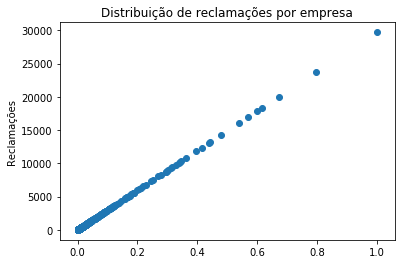

In [25]:
plt.scatter(norm_rank, rank_reclamacoes)
plot_routine(title='Distribuição de reclamações por empresa', ylabel='Reclamações', file='dist-reclamacoes.png')

<div class="alert alert-block alert-success">
**Como prevemos, as empresas se concentram na porção inferior do gráfico, com poucas reclamações.** Visto que estamos interessados naquelas com mais chances de ter uma reputação negativa maior, desconsideraremos este grupo de empresas para nossa decisão. Sendo assim, podemos separar as empresas relevantes para o nosso problema.

In [16]:
reclamacoes_relevantes = rank_reclamacoes[norm_rank > 0.15]
reclamacoes_relevantes.describe()

count       44.000000
mean      9922.068182
std       5534.062944
min       4687.000000
25%       5614.750000
50%       8743.500000
75%      11923.500000
max      29703.000000
Name: RazaoSocialRFB, dtype: float64

Podemos ver que o número de empresas diminuiu consideravelmente *(de ```69883``` para ```44```)*. Além disso, temos valores para a média e para os quartis muito mais condizentes com o nosso problema.

<a id='atendimento'></a>
## Porcentagem de atendimento

Agora que temos um conjunto mais restrito de empresas, vamos explorar outra métrica que pode nos ajudar.

Novamente, começamos contando o número de reclamações atendidas por cada empresa e, então, calculamos a porcentagem relativa ao total de reclamações da empresa.

In [17]:
atendimentos = dataset['RazaoSocialRFB'].where(dataset['Atendida'] == "S").value_counts()
rank_atendimentos = (atendimentos/rank_reclamacoes).align(rank_reclamacoes, join='right', axis=0)[0]
rank_atendimentos.describe()

count    43464.000000
mean         0.837729
std          0.253810
min          0.011905
25%          0.666667
50%          1.000000
75%          1.000000
max          1.000000
Name: RazaoSocialRFB, dtype: float64

Podemos ver que grande parte das empresas tem 100% de atendimento, o que faz a média ser mais alta do que deveria. No entanto, isso provavelmente é causado, novamente, pelas empresas com poucas reclamações, afinal elas não possuem um volume grande o suficiente para que o atendimento seja um problema. Logo, vamos considerar somente o conjunto que determinamos ao analisarmos a [frequência de reclamações](#freq).

In [18]:
atendimentos_relevantes = rank_atendimentos[norm_rank>0.15]
atendimentos_relevantes.describe()

count    44.000000
mean      0.676287
std       0.106133
min       0.382897
25%       0.596626
50%       0.709094
75%       0.756256
max       0.842913
Name: RazaoSocialRFB, dtype: float64

Agora que as estatísticas estão em ordem, vamos olhar no gráfico como a porcentagem de atendimento se relaciona com a quantidade de reclamações das empresas.

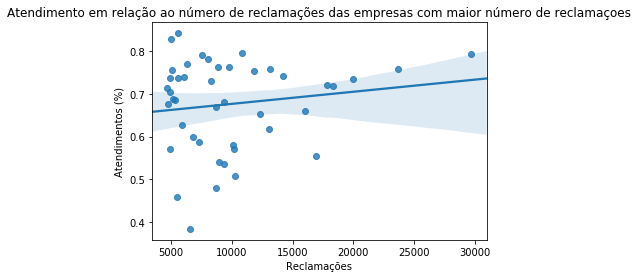

In [19]:
sns.regplot(reclamacoes_relevantes,atendimentos_relevantes)
plot_routine(title='Atendimento em relação ao número de reclamações das empresas com maior número de reclamaçoes', xlabel='Reclamações', ylabel='Atendimentos (%)', file='dist-atendimentos-relevantes.png')

<div class="alert alert-block alert-success">

**Pelo gráfico, vemos que o atendimento, em média, tende a melhorar conforme o número de reclamações aumenta.** Isso provavelmente ocorre pois, conforme a empresa tem mais reclamações, ela é obrigada a investir na resolução dos problemas do consumidor, de forma que sua reputação não seja completamente afundada.


<a id='tempo'></a>
## Tempo médio de resolução

Para completar nossa análise, vamos adicionar nossa última métrica nas relações.

In [20]:
df_tempo = dataset.filter(items=['RazaoSocialRFB', 'DataAbertura', 'DataArquivamento'])

Como as datas das reclamações estão como ```string``` no nosso *dataframe*, primeiro temos que transformá-las em objetos ```datetime```, para então calcular a diferença de tempo entre elas.

In [21]:
df_tempo['TempoResolucao'] = pd.to_datetime(df_tempo['DataArquivamento'], format="%Y-%m-%d %H:%M:%S.%f") - pd.to_datetime(df_tempo['DataAbertura'], format="%Y-%m-%d %H:%M:%S.%f")

Agora podemos agrupar e calcular o tempo médio para cada empresa.

In [22]:
rank_tempos = df_tempo.groupby('RazaoSocialRFB')['TempoResolucao'].apply(pd.Series.mean).align(rank_reclamacoes, join='right', axis=0)[0]
rank_tempos[rank_tempos > timedelta(0)].describe()

count                       69881
mean     251 days 09:58:01.841886
std      363 days 11:04:43.647234
min               0 days 00:00:18
25%              57 days 09:00:54
50%             121 days 07:29:15
75%             278 days 22:13:17
max            3924 days 03:27:38
Name: TempoResolucao, dtype: object

Temos uma grande amplitude de valores (de ```18 segs``` até ```3924 dias```). Isso é algo que provavelmente irá nos atrapalhar, vamos restringir o conjunto de empresas para o definido previamente, de novo.

In [23]:
tempos_relevantes = rank_tempos[norm_rank > 0.15]
tempos_relevantes.describe()

count                          44
mean     222 days 03:46:15.747871
std       79 days 12:04:01.096299
min       91 days 00:39:47.257160
25%      176 days 10:01:01.564700
50%      208 days 01:41:21.699168
75%      250 days 09:22:55.449254
max      566 days 19:33:30.694918
Name: TempoResolucao, dtype: object

Os dados passaram a se comportar de maneira muito melhor depois que restringimos o conjunto de empresas. **Podemos, finalmente, ver como as três métricas se relacionam no gráfico.**

In [24]:
dias_relevantes = tempos_relevantes.apply(timedelta.total_seconds)/86400.0

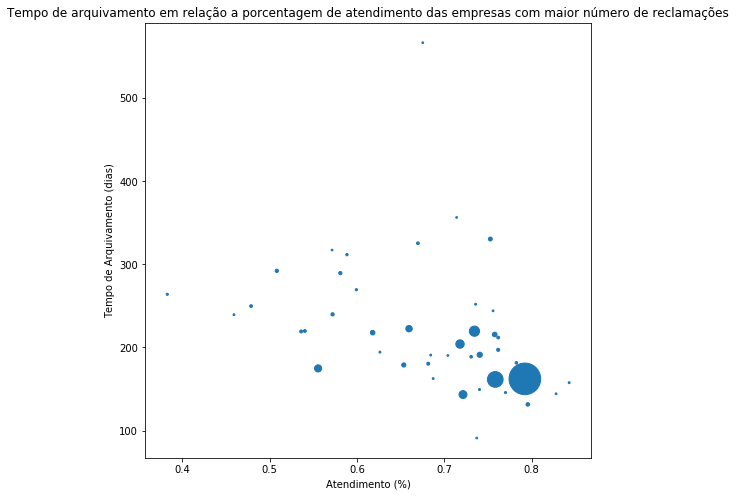

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(atendimentos_relevantes, dias_relevantes, s= 10 ** (3 * norm_rank[norm_rank > 0.15]))
plot_routine(title='Tempo de arquivamento em relação a porcentagem de atendimento das empresas com maior número de reclamações',
            xlabel='Atendimento (%)', ylabel='Tempo de Arquivamento (dias)', file='dist-arquivamento-atendimento-relevantes.png')

<div class="alert alert-block alert-success">

Temos um resultado interessante: **as empresas com mais reclamações se concentram no quadrante inferior direito.** Esse fato está concordando com a hipótese levantada na análise da [porcentagem de atendimento](#atendimento) de que existe uma demanda crescente por investimento na área.

<a id='conclusao'></a>
# Conclusão

## Encontrando as empresas mais odiadas

Diante do observado durante a [análise dos dados](#analise), podemos inferir que as empresas mais odiadas são aquelas que falham em suprir a demanda por investimento no atendimento aos seus clientes. Ou seja, devemos comparar o desempenho de cada empresa nas três métricas em relação à média do mercado para discernir quais estão abaixo do esperado pelo consumidor.

In [26]:
df_meannorm_relevante = pd.DataFrame({
        'Reclamacoes': meannorm(reclamacoes_relevantes),
        'Atendimento': meannorm(atendimentos_relevantes*(-1)),
        'TempoResolucao': meannorm(tempos_relevantes)
})

In [27]:
rank_odiadas = (df_meannorm_relevante['Reclamacoes']+df_meannorm_relevante['Atendimento']+df_meannorm_relevante['TempoResolucao']).sort_values(ascending=False)
mais_odiadas = rank_odiadas[:10]

Com as informações em mãos, podemos desenhar um gráfico que nos mostre as empresas com o maior índice de insatisfação.

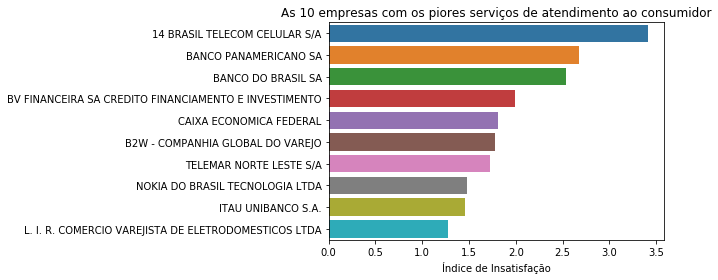

In [28]:
sns.barplot(y=mais_odiadas.keys(), x=mais_odiadas.get_values(), orient='h')
plot_routine(title='As 10 empresas com os piores serviços de atendimento ao consumidor', xlabel='Índice de Insatisfação', file='mais-odiadas.png')

## Avaliação setorial

Para concluir, vamos identificar os setores com maior número de reclamações em cada ano.

In [29]:
setores = dataset.groupby(['DescCNAEPrincipal', 'AnoCalendario']).size()\
            .to_frame('freq').reset_index()\
            .set_index(['DescCNAEPrincipal', 'AnoCalendario'])\
            .freq.unstack(fill_value=0)

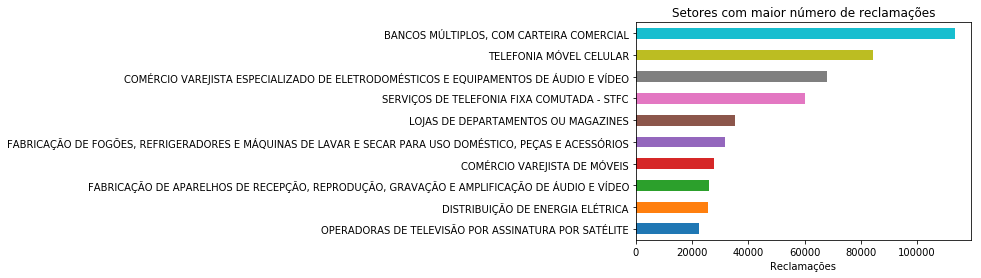

In [31]:
rank_setores = setores.stack().unstack(level=0).sum().sort_values(ascending=False)[:10]
ax = rank_setores.sort_values().plot(
    kind='barh'
)

ax.set_title('Setores com maior número de reclamações')
ax.set_ylabel('')
ax.set_xlabel('Reclamações');

In [32]:
rank_setores_anual = setores.align(rank_setores, join='right', axis=0)[0]

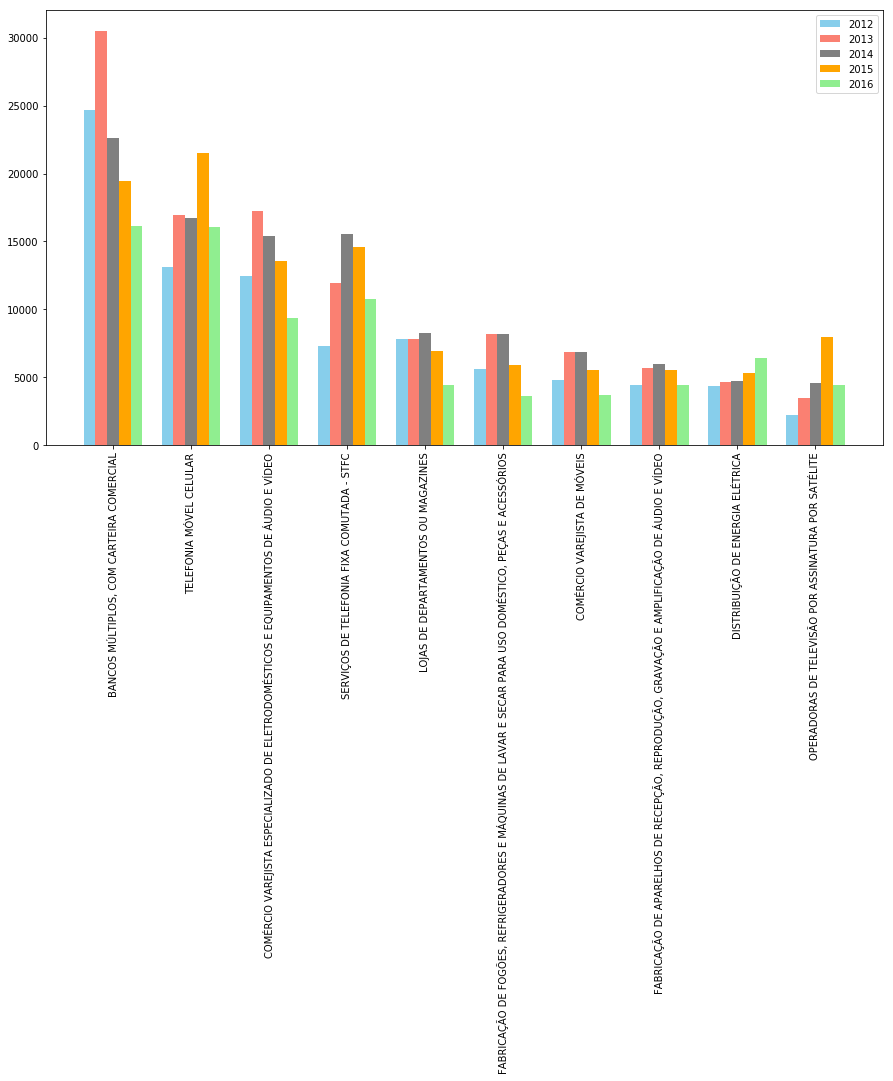

In [45]:
width = 0.3
ind = np.arange(len(rank_setores_anual[2012]))

fig, ax = plt.subplots(figsize=(15,8))

rects2012 = ax.bar(ind - width, rank_setores_anual[2012], width/2,
                color='SkyBlue', label='2012')
rects2012 = ax.bar(ind - width/2, rank_setores_anual[2013], width/2,
                color='Salmon', label='2013')
rects2014 = ax.bar(ind, rank_setores_anual[2014], width/2,
                color='Grey', label='2014')
rects2015 = ax.bar(ind + width/2, rank_setores_anual[2015], width/2,
                color='Orange', label='2015')
rects2016 = ax.bar(ind + width, rank_setores_anual[2016], width/2,
                color='LightGreen', label='2016')

plt.xticks(rotation=90)
ax.set_xticks(ind)
ax.set_xticklabels(rank_setores_anual[2012].keys())
ax.legend();

<div class="alert alert-block alert-success">

O setor bancário e o setor de telecomunicações alternam entre si como primeiro colocados e, como era de se esperar, a grande maioria das empresas constatadas como mais odiadas se encontram nestes ramos de atividade.